In [61]:
import pandas as pd
import numpy as np
import random
import math
import networkx as nx
import matplotlib.pyplot as plt

In [62]:
def gen_station_names(amount):
    """
    Creates names for stations given an amount of stations.
    """
    name_list = ['Root']
    for name in range(amount):
        name_list.append(chr(65 + name))
    return name_list

names = gen_station_names(5)
names

['Root', 'A', 'B', 'C', 'D', 'E']

In [63]:
def gen_locations(name_list):
    """
    Given a list of station names, generates random locations.
    """
    location_list = []
    max_xy = math.ceil(len(name_list) / 2)

    while len(location_list) < len(name_list):

        new_location = [np.random.randint(0, max_xy), np.random.randint(0, max_xy)]
        if new_location not in location_list:
            location_list.append(new_location)
    return location_list

locations = gen_locations(names)
print(len(names), len(locations))
locations

6 6


[[0, 1], [0, 0], [1, 2], [2, 2], [1, 0], [2, 0]]

In [64]:
def gen_connections(name_list, location_list):
    """
    Takes a list of names and corresponding locations and generates connections between them.
    """
    connection_list = []
    final_list = []
    new_connection_list = []
    
    for station in range(len(name_list)):
        # Finds for a station which other stations can be directly connected to it
        possible_connections = [location for location in location_list if location_list[station][0] == location[0]
                                 or location_list[station][1] == location[1]]
        
        # Removes the station itself
        possible_connections.remove(location_list[station])

        # Remove too far stations
        #for connection in possible_connections:
        #    print()

        # If no stations can be connected, create a station which is can subsequently be connected with another station
        if len(possible_connections) == 0:

            #Select a random station to indirectly connect to
            connecting_station = random.choice(location_list)

            # Append new station name
            name_list.append(chr(64 + len(name_list)))

            # Append new connection
            new_connection_list.append([connecting_station])

            # Create a random variable which is used to determine on which axis the station gets generated
            decider_var = random.choice([0,1])

            # Create random location for station which can connect to the current station and add it to location_list and connection_list
            if decider_var == 0:
                location_list.append([location_list[station][0], connecting_station[1]])
                connection_list.append([[location_list[station][0], connecting_station[1]]])
            else:
                location_list.append([connecting_station[0] , location_list[station][0]])
                connection_list.append([[connecting_station[0] , location_list[station][0]]])
                #print('Succesfully added a station {} and connected it to {}'.format(name_list[-1], name_list[station]))
                
        else:
            # TODO add already existing elements to the made choice
            connection_list.append(random.sample(possible_connections, random.randint(1, len(possible_connections))))

    # TODO fix all the lines going trough a station without connecting
    # Renames the locations to station names
    mapping_dict = dict(zip(map(tuple, location_list), name_list))

    #print('name_list: {}, location_list: {}, connection_list: {}'.format(name_list, location_list, connection_list))

    # Adds connections for newly generated stations to the list
    connection_list = connection_list + new_connection_list

    for connection in connection_list:
        final_list.append([mapping_dict[tuple(item)] for item in connection])
    
    
    
    return final_list
        


In [65]:
amount_stations = 10
test_names = gen_station_names(amount_stations)
test_locations = gen_locations(test_names)
test_connections = gen_connections(test_names, test_locations)




temp_con = test_connections.copy()
for station in range(len(test_names)):
    for connection in test_connections[station]:
        index = test_names.index(connection)
        temp_var = set(test_connections[index])
        temp_var.add(test_names[station])
        test_connections[index] = list(temp_var)

data = {
    'Station_names': test_names,
    'ins': temp_con,
    'outs': test_connections
}

df_stations = pd.DataFrame(data)
df_stations

,Station_names,ins,outs
0,Root,[F],[F]
1,A,[H],[H]
2,B,"[E, F]","[E, F]"
3,C,"[H, I, G, J]","[J, G, I, H]"
4,D,[I],[I]
5,E,[F],"[F, B]"
6,F,[Root],"[E, B, Root]"
7,G,"[C, J]","[J, C]"
8,H,[A],"[C, A]"
9,I,"[D, J]","[J, C, D]"


In [66]:
def plot_graph(df_stations):
    G = nx.Graph()

    # Add nodes to the graph
    for i, row in df_stations.iterrows():
        G.add_node(row['Station_names'], pos=row['Station_locations'])

    # Add edges to the graph
    for i, row in df_stations.iterrows():
        for dest in row['Connected_to']:
            G.add_edge(row['Station_names'], dest)

    # Get positions of nodes
    pos = nx.get_node_attributes(G, 'pos')

    # Plot the graph
    plt.figure(figsize=(10, 6))
    nx.draw(G, pos, with_labels=True, node_size=1000, node_color='lightblue', font_size=10, font_weight='bold')
    plt.title('Subway')
    return plt

In [67]:
amount_stations = 10
# test_names = gen_station_names(amount_stations)
# test_locations = gen_locations(test_names)
# test_connections = gen_connections(test_names, test_locations)

data = {
    'Station_names': test_names,
    'Station_locations': test_locations,
    'Connected_to': test_connections
}

df_stations = pd.DataFrame(data)


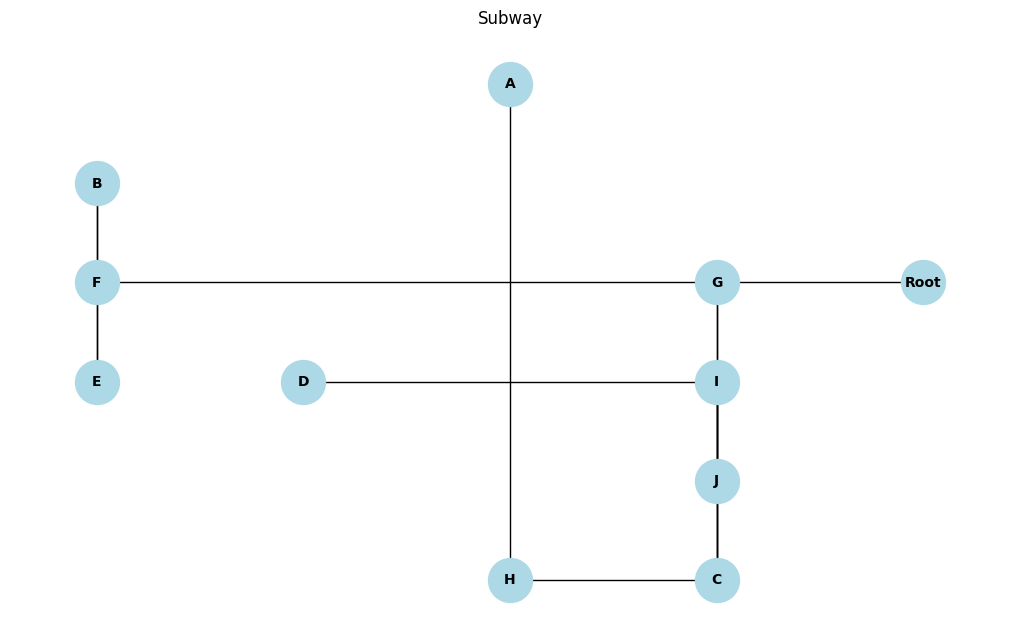

In [68]:
plot = plot_graph(df_stations)
plot.show()